<a href="https://colab.research.google.com/github/causa0sui/dw_matrix_road_sign/blob/master/day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import datetime
import os

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

%load_ext tensorboard

In [0]:
cd '/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign'

/content/drive/My Drive/Colab Notebooks/matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle("data/train.p")
test = pd.read_pickle("data/test.p")

X_train, y_train = train["features"], train["labels"]
X_test, y_test = test["features"], test["labels"]

In [0]:
 y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [0]:
len(np.unique(y_train))

43

In [0]:
to_categorical(y_train)[-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [0]:
 np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
 input_shape = X_train.shape[1:]
 num_classes = y_train.shape[1]

In [0]:
model = Sequential([
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape = input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
])

In [0]:
#model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 5s 5ms/step - loss: 10.0776 - accuracy: 0.7862


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape = input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),
])


def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss = 'categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size = params_fit.get('batch_size', 128),
      epochs = params_fit.get('epochs', 5),
      verbose = params_fit.get('verbose', 1),
      validation_data = params_fit.get('validation_data', (X_train, y_train)),
      callbacks = [tensorboard_callback]
      )
  return model

In [0]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 5s 17ms/step - loss: 24.8117 - accuracy: 0.7470 - val_loss: 0.2518 - val_accuracy: 0.9486
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.2367 - accuracy: 0.9452 - val_loss: 0.2202 - val_accuracy: 0.9476
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1450 - accuracy: 0.9668 - val_loss: 0.1126 - val_accuracy: 0.9724
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1464 - accuracy: 0.9674 - val_loss: 0.1100 - val_accuracy: 0.9765
Epoch 5/5
272/272 [==============================] - 5s 17ms/step - loss: 0.1184 - accuracy: 0.9734 - val_loss: 0.0821 - val_accuracy: 0.9828


In [0]:
df = pd.read_csv("data/signnames.csv")
labels_dict = df.to_dict()['b']


In [0]:
def predict(model_trained, X_test, y_test, scoring = accuracy_score):

  y_test_norm = np.argmax(y_test, axis = 1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis = 1)

  return scoring(y_test_norm, y_pred)


In [0]:
predict(model_trained, X_test, y_test)

0.8303854875283446

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)
  return predict(model_trained, X_test, y_test)

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size = (3, 3), activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])



train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 18ms/step - loss: 3.9373 - accuracy: 0.3132 - val_loss: 1.3468 - val_accuracy: 0.6382
Epoch 2/5
272/272 [==============================] - 5s 17ms/step - loss: 0.9426 - accuracy: 0.7220 - val_loss: 0.2840 - val_accuracy: 0.9366
Epoch 3/5
272/272 [==============================] - 5s 17ms/step - loss: 0.4534 - accuracy: 0.8674 - val_loss: 0.1259 - val_accuracy: 0.9736
Epoch 4/5
272/272 [==============================] - 5s 17ms/step - loss: 0.3076 - accuracy: 0.9095 - val_loss: 0.0626 - val_accuracy: 0.9881
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.2468 - accuracy: 0.9276 - val_loss: 0.0563 - val_accuracy: 0.9911


0.9267573696145125

In [0]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size = (3, 3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size = (3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])



train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
272/272 [==============================] - 5s 20ms/step - loss: 2.0898 - accuracy: 0.5279 - val_loss: 0.3124 - val_accuracy: 0.9346
Epoch 2/5
272/272 [==============================] - 5s 19ms/step - loss: 0.4726 - accuracy: 0.8581 - val_loss: 0.0956 - val_accuracy: 0.9822
Epoch 3/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2649 - accuracy: 0.9230 - val_loss: 0.0610 - val_accuracy: 0.9874
Epoch 4/5
272/272 [==============================] - 5s 19ms/step - loss: 0.2066 - accuracy: 0.9386 - val_loss: 0.0521 - val_accuracy: 0.9891
Epoch 5/5
272/272 [==============================] - 5s 18ms/step - loss: 0.1492 - accuracy: 0.9546 - val_loss: 0.0296 - val_accuracy: 0.9929


0.9596371882086168

In [0]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size = (3, 3), activation='relu', input_shape = input_shape),
    Conv2D(filters=32, kernel_size = (3, 3), activation='relu', padding = 'same'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=64, kernel_size = (3, 3), activation='relu'),
    #MaxPool2D(),
    Dropout(0.3),

    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),
])

get_cnn_v4(input_shape, num_classes).summary()

train_and_predict(get_cnn_v4(input_shape, num_classes))

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)        

0.9616780045351474

In [0]:
X_train[0].shape

(32, 32, 3)

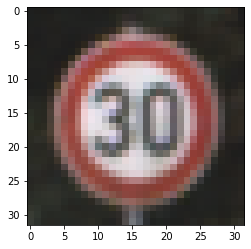

In [0]:
plt.imshow(X_test[500])

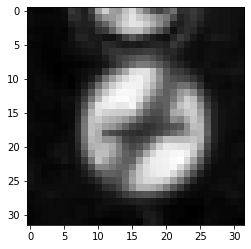

In [0]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1, 32, 32, 1)
X_test_gray = color.rgb2gray(X_test).reshape(-1, 32, 32, 1)

In [0]:
model = get_cnn_v4((32,32,1), num_classes)
#model.compile(loss = 'crossenthropy', optimizer = 'Adam', metrics = ['accuracy'])
model_trained = train_model(model, X_train_gray, y_train, params_fit = {})
predict(model_trained, X_test_gray, y_test) #4 dzień

Epoch 1/5
272/272 [==============================] - 7s 24ms/step - loss: 1.7053 - accuracy: 0.5244 - val_loss: 0.2342 - val_accuracy: 0.9398
Epoch 2/5
272/272 [==============================] - 6s 23ms/step - loss: 0.2646 - accuracy: 0.9176 - val_loss: 0.0631 - val_accuracy: 0.9833
Epoch 3/5
272/272 [==============================] - 6s 23ms/step - loss: 0.1378 - accuracy: 0.9582 - val_loss: 0.0334 - val_accuracy: 0.9900
Epoch 4/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0987 - accuracy: 0.9686 - val_loss: 0.0175 - val_accuracy: 0.9955
Epoch 5/5
272/272 [==============================] - 6s 23ms/step - loss: 0.0720 - accuracy: 0.9778 - val_loss: 0.0122 - val_accuracy: 0.9968


0.964172335600907

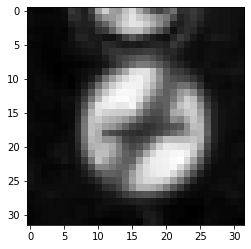

In [0]:
plt.imshow(color.rgb2gray(X_train[0]), cmap = plt.get_cmap('gray'))

In [0]:
%tensorboard --logdir logs

In [0]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size = (3, 3), activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.5),

    Conv2D(filters=64, kernel_size = (3, 3), activation='relu', input_shape = input_shape),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.5),

    Dense(num_classes, activation = 'softmax')
])



In [0]:
model = get_cnn_v2(input_shape, num_classes)
params_fit = {
    'epochs': 25
}
train_model(model, X_train, y_train, params_fit)

Epoch 1/25
272/272 [==============================] - 3s 10ms/step - loss: 8.0911 - accuracy: 0.1172 - val_loss: 2.8891 - val_accuracy: 0.2103
Epoch 2/25
272/272 [==============================] - 2s 9ms/step - loss: 2.4857 - accuracy: 0.3172 - val_loss: 1.7992 - val_accuracy: 0.4779
Epoch 3/25
272/272 [==============================] - 3s 9ms/step - loss: 1.7653 - accuracy: 0.4677 - val_loss: 1.0919 - val_accuracy: 0.6713
Epoch 4/25
272/272 [==============================] - 3s 9ms/step - loss: 1.1830 - accuracy: 0.6329 - val_loss: 0.5528 - val_accuracy: 0.8474
Epoch 5/25
272/272 [==============================] - 2s 9ms/step - loss: 0.8414 - accuracy: 0.7384 - val_loss: 0.3469 - val_accuracy: 0.9223
Epoch 6/25
272/272 [==============================] - 2s 9ms/step - loss: 0.6538 - accuracy: 0.7961 - val_loss: 0.2654 - val_accuracy: 0.9330
Epoch 7/25
272/272 [==============================] - 2s 9ms/step - loss: 0.5449 - accuracy: 0.8305 - val_loss: 0.1558 - val_accuracy: 0.9643
Epoch

'logs/20200402-131908'

In [0]:
%tensorboard --logdir logs